In [238]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
%matplotlib inline

In [239]:
df = pd.read_csv("final_unextracted_data.csv")

In [240]:
df["log_price"] = pd.DataFrame(np.log(df['price(€)']))
df["log_monthly"] = pd.DataFrame(np.log(df['monthly(€)']))

In [241]:
df

,category,price(€),monthly(€),description,energy_performance_diagnosis_(kWhEP/m².year),Greenhouse_gas_emission(kgeqCO2/m².year),type,terrace,view,area(m²),...,central_heating,individual_heating,floor_heating,communal_heating,heating_air_conditioning,reversible_heating,region_1,region_2,log_price,log_monthly
0,Maison / Villa,349500,1449,Belle maison en sous/bassement meulière très b...,150.0,35.0,Acheter,1,0,105.00,...,0,1,0,0,0,0,Vigneux-sur-Seine,Le Lac-Briques Rouges,12.764259,7.278629
1,Maison / Villa,335000,1389,Idéalement situé entre Clermont l'Hérault et L...,0.0,0.0,Acheter,1,0,185.00,...,0,0,0,0,0,0,Clermont-l Herault,Centre Ville,12.721886,7.236339
2,Maison / Villa,2490000,10270,Superbe Villa dans les hauteurs de Nice/Villef...,99.0,19.0,Acheter,0,1,220.00,...,1,0,0,0,0,0,Nice,Vinaigrier,14.727793,9.236982
3,Maison / Villa,356000,1476,"A découvrir à 5km de Gouvieux, maison ancienne...",0.0,0.0,Acheter,0,0,130.00,...,0,1,0,0,0,0,Gouvieux,Sud,12.782686,7.297091
4,Maison / Villa,388500,1610,MAISON INDIVIDUELLE DE 6 PIÈCES A VENDRE A PLA...,214.0,11.0,Acheter,1,0,102.00,...,0,0,0,0,0,0,Plaisir,Centre Ville,12.870048,7.383989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,Maison / Villa,148000,619,0,216.0,11.0,Acheter,1,0,127.00,...,0,0,0,0,0,0,Villeparisis,0,11.904968,6.428105
1988,Maison / Villa,75240,317,0,305.0,0.0,Acheter,0,0,140.00,...,0,1,0,0,0,0,Carnac,0,11.228438,5.758902
1989,Appartement,375000,1554,0,167.0,7.0,Acheter,1,0,72.45,...,0,1,0,0,0,0,Mandelieu-la-Napoule,0,12.834681,7.348588
1990,Appartement,520000,2152,0,125.0,3.0,Acheter,1,0,110.00,...,0,1,0,0,0,0,Hyeres,0,13.161584,7.674153


In [242]:
df=df.drop("description",1)

In [ ]:
report_v1 = pandas_profiling.ProfileReport(df)

In [ ]:
report_v1.to_notebook_iframe()

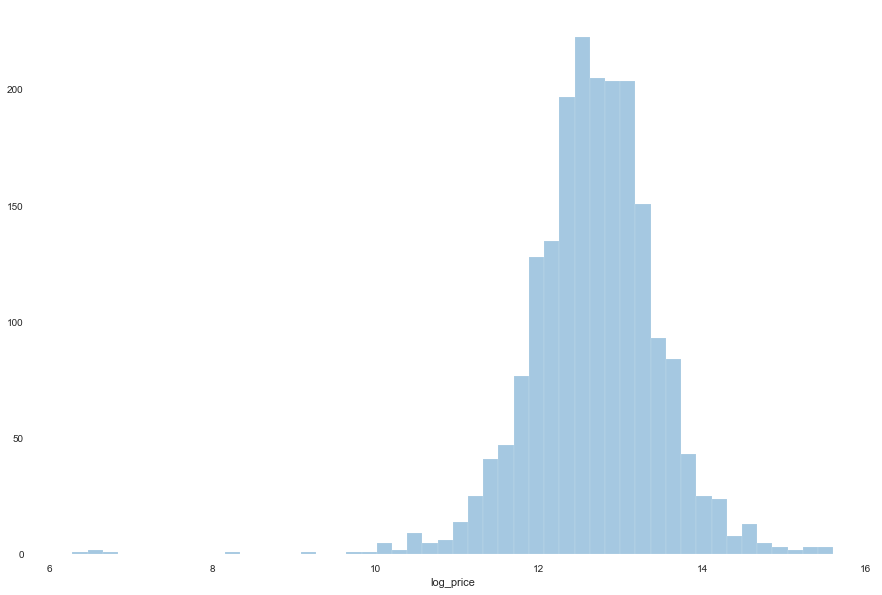

In [243]:
plt.figure(figsize=(15,10))
sns.distplot(df.log_price,kde=False)

In [244]:
df2=pd.DataFrame()
df2['City'] = list(df.groupby('region_1')['type'].count().index)
df2['count']=list(df.groupby('region_1')['type'].count())
fig = px.bar(df2, x='City', y='count', color='count', orientation='v', height=600,
             title='Number of ads in each city', color_discrete_sequence = px.colors.cyclical.mygbm)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [245]:
df2=pd.DataFrame()
df2['Year of construction'] = list(df.loc[df['year_of_construction'] > 1200].groupby('year_of_construction')['type'].count().index)
df2['count']=list(df.loc[df['year_of_construction'] > 1200].groupby('year_of_construction')['type'].count())
fig = px.bar(df2, x='Year of construction', y='count', color='count', orientation='v', height=600,
             title='Years of construction', color_discrete_sequence = px.colors.cyclical.mygbm)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [246]:
df2=pd.DataFrame()
df2['Category'] = list(df.groupby('category')['type'].count().index)
df2['count']=list(df.groupby('category')['type'].count())
fig = px.bar(df2, x='Category', y='count', color='count', orientation='v', height=600,
             title='Number of category in each ad', color_discrete_sequence = px.colors.cyclical.mygbm)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()


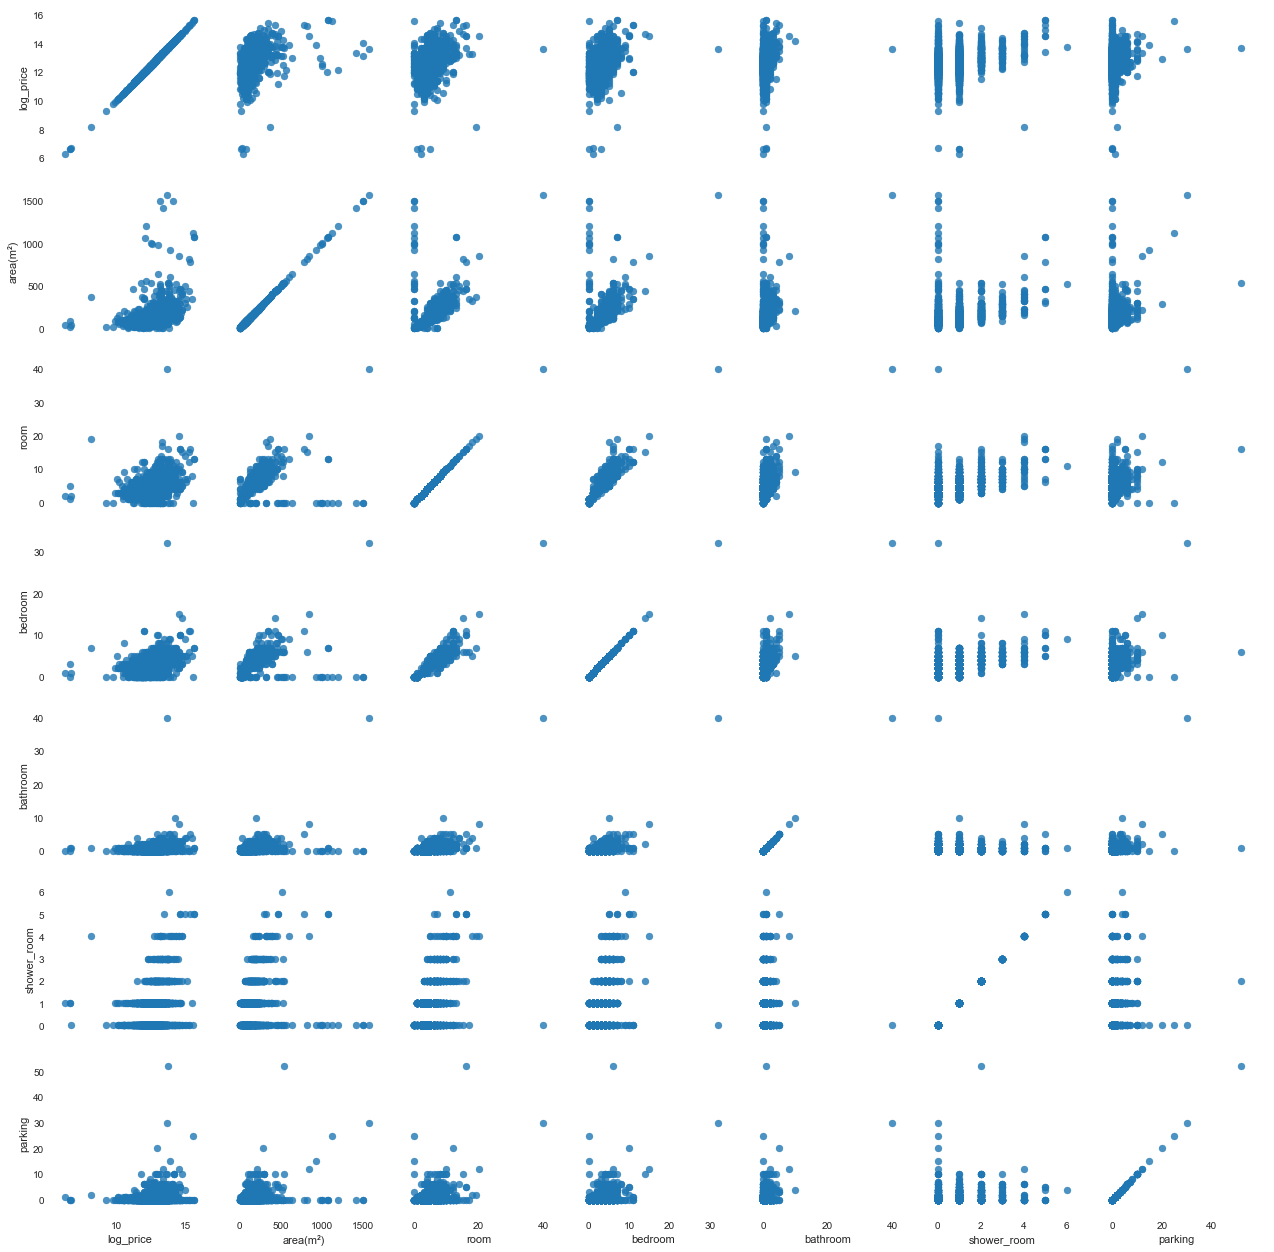

In [247]:
g = sns.PairGrid(df, vars=['log_price', 'area(m²)', 'room', 'bedroom', 'bathroom', 'shower_room', 'parking'],
                 palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

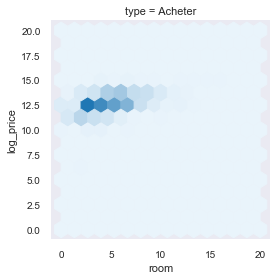

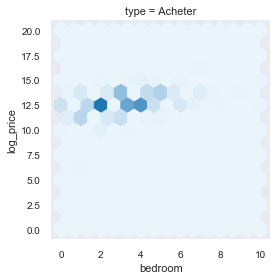

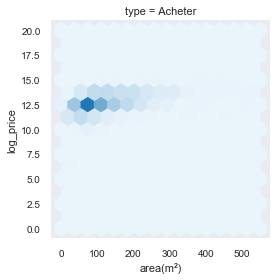

In [248]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g1 = sns.FacetGrid(df, hue="type", col="type", height=4)
    g2 = sns.FacetGrid(df, hue="type", col="type", height=4)
    g3 = sns.FacetGrid(df, hue="type", col="type", height=4)


g1.map(hexbin, "room", "log_price", extent=[0, 20, 0, 20]);
g2.map(hexbin, "bedroom", "log_price", extent=[0, 10, 0, 20]);
g3.map(hexbin, "area(m²)", "log_price", extent=[0, 550, 0, 20]);

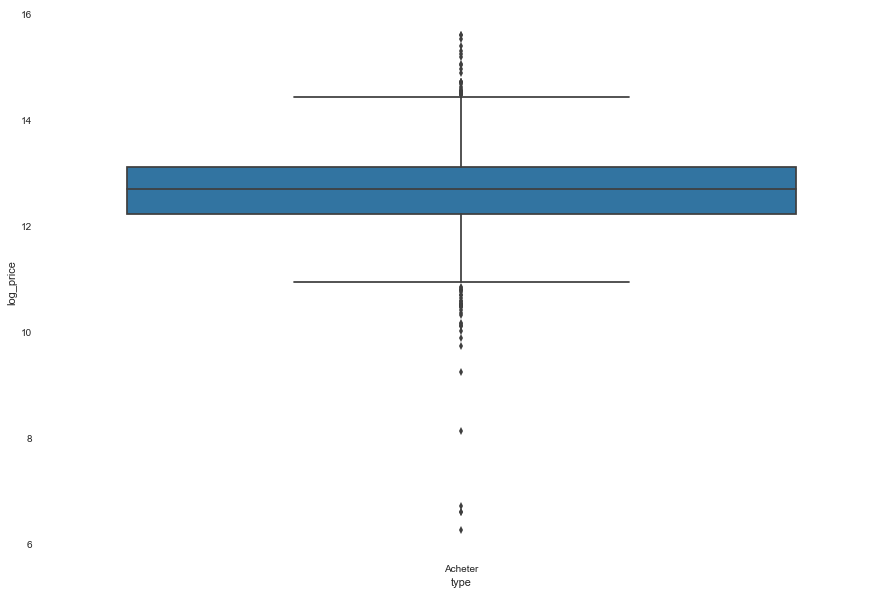

In [249]:
plt.figure(figsize=(15,10))
sns.boxplot(x='type',y='log_price', data=df)